In [40]:
# Linear Regression applied on Boston Housing Dataset (506 samples) to predict house prices. 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline') #to plot graph embedded in notebook
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score

boston_dataset = load_boston()

print(type(boston_dataset)) #dictionary-like object
print(boston_dataset.keys()) #dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename']) - can call with dot operator like an attribute                              #or index like dictionary
print(boston_dataset.feature_names)
print(boston_dataset['DESCR'])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted d

In [23]:
boston_df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
print(boston_df.head())
boston_df['PRICE'] = boston_dataset.target
boston_df = boston_df.dropna()
print(boston_df.head())
assert boston_df.isnull().sum().sum() == 0
print(boston_df.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.

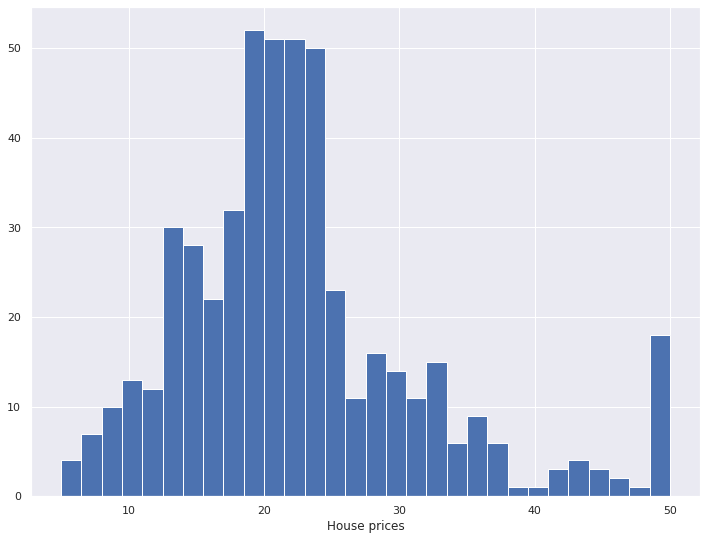

In [24]:
#Distribution of House Prices

sns.set(rc={'figure.figsize':(12,9)})
plt.hist(boston_df['PRICE'], bins=30)
plt.xlabel("House prices")
plt.show()

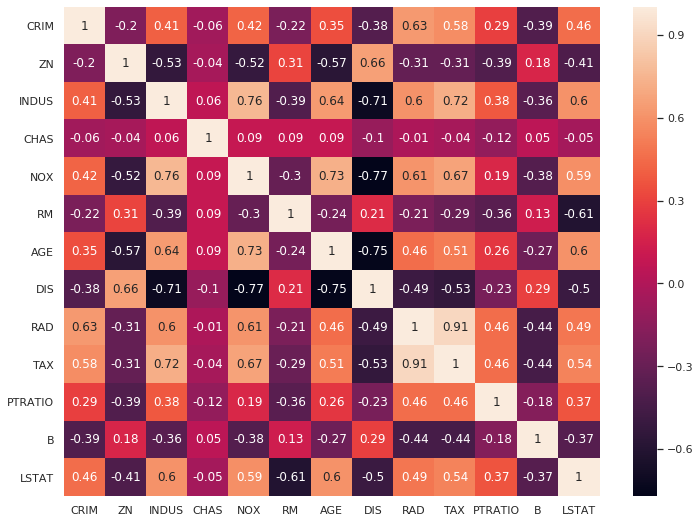

In [25]:
bos_df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

correlation_matrix = bos_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

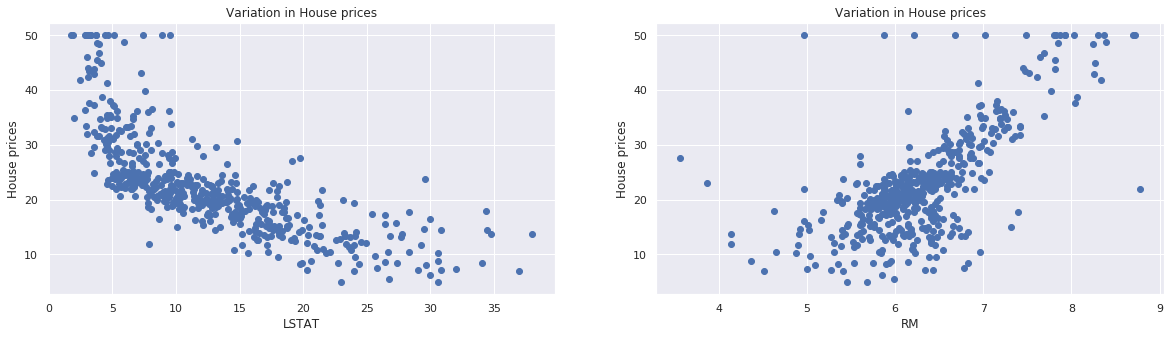

In [28]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = boston_df['PRICE']
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('House prices')

(404, 1)
(102, 1)
(404, 1)
(102, 1)
<class 'sklearn.linear_model.base.LinearRegression'>


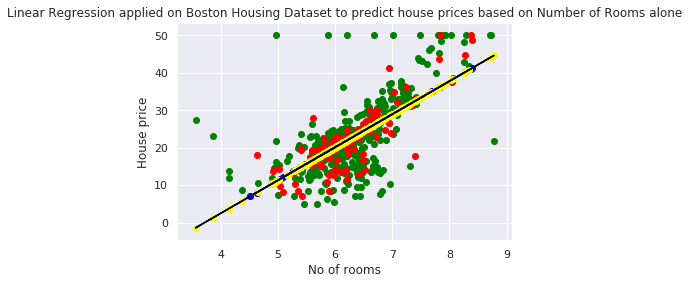

In [42]:
# First using 1 feature - number of rooms - without dataframe
no_rooms_train,no_rooms_test,price_train,price_test = train_test_split(boston_dataset.data[:,5].reshape(-1,1),boston_dataset.target.reshape(-1,1),test_size = 0.2,random_state=1)
print(no_rooms_train.shape)
print(no_rooms_test.shape)
print(price_train.shape)
print(price_test.shape)
model = LinearRegression()
print(type(model))
model.fit(no_rooms_train,price_train)
#print(model.predict(no_rooms_test))
price_train_pred = model.predict(no_rooms_train)
price_test_pred = model.predict(no_rooms_test)
plt.scatter(no_rooms_train,price_train,color = 'green')
plt.scatter(no_rooms_test,price_test,color = 'red')
plt.scatter(no_rooms_test,price_test_pred,color = 'blue')
plt.scatter(no_rooms_train,price_train_pred,color = 'yellow')
plt.plot(no_rooms_test,price_test_pred,color = 'gray')   
plt.plot(no_rooms_train,price_train_pred,color = 'black') 
plt.title('Linear Regression applied on Boston Housing Dataset to predict house prices based on Number of Rooms alone')
plt.xlabel('No of rooms')
plt.ylabel('House price')
plt.show()

(506, 1)
(506, 1)
(404, 1)
(102, 1)
(404, 1)
(102, 1)
The model performance for training set
RMSE: 6.664403061122336
R2: 0.45
The model performance for test set
RMSE: 6.383135112649168
R2: 0.59


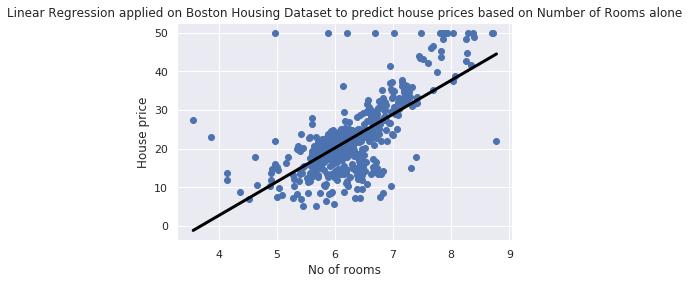

In [45]:
# Second using 1 feature - number of rooms - with dataframe
X_rooms = np.array(boston_df.RM).reshape(-1,1)
y_price = np.array(boston_df.PRICE).reshape(-1,1)
print(X_rooms.shape)
print(y_price.shape)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=1)
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)
lr_1 = LinearRegression()
lr_1.fit(X_train_1, y_train_1)
y_train_pred_1 = lr_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(y_train_1, y_train_pred_1)))
r2 = round(lr_1.score(X_train_1, y_train_1),2)
print("The linear regression model performance on training set")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
y_test_pred_1 = lr_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(y_test_1, y_test_pred_1)))
r2 = round(lr_1.score(X_test_1, y_test_1),2)
print("The linear regression model performance on test set")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, lr_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.title('Linear Regression applied on Boston Housing Dataset to predict house prices based on Number of Rooms alone')
plt.xlabel('No of rooms')
plt.ylabel('House price')
plt.show()

(404, 13)
(102, 13)
(404,)
(102,)
The linear regression model performance on training set
RMSE: 4.675766751547772
R2: 0.73
The linear regression model performance on test set
RMSE: 4.835373458200514
R2: 0.76


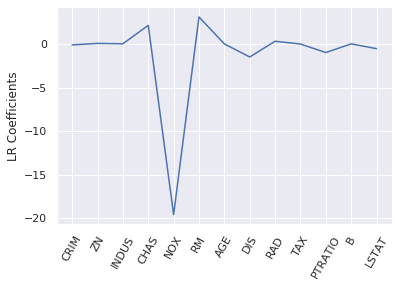

In [51]:
# Third using all features - number of rooms - with dataframe
X = bos_df # boston_df.drop('PRICE', axis = 1)
y = boston_df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
y_train_pred = lr_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = round(lr_all.score(X_train, y_train),2)
print("The linear regression model performance on training set")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
y_test_pred = lr_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = round(lr_all.score(X_test, y_test),2)
print("The linear regression model performance on test set")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))
plt.plot(range(len(boston_dataset.feature_names)),lr_all.coef_)
plt.xticks(range(len(boston_dataset.feature_names)),boston_dataset.feature_names, rotation = 60)
plt.ylabel('LR Coefficients')
plt.show()

[ 0.5839083   0.53248448 -5.86898835]
-1.58
[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.35
[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
0.2
The ridge regression model performance on training set
RMSE: 4.762682712497925
R2: 0.72
The ridge regression model performance on test set
RMSE: 4.975479828343315
R2: 0.75
The lasso regression model performance on training set
RMSE: 5.7451308057613435
R2: 0.59
The lasso regression model performance on test set
RMSE: 6.433526875615274
R2: 0.58


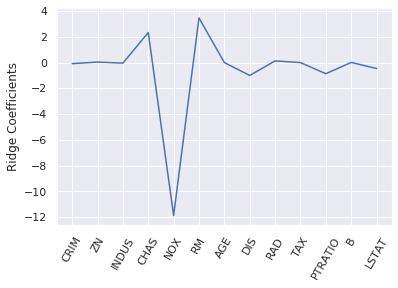

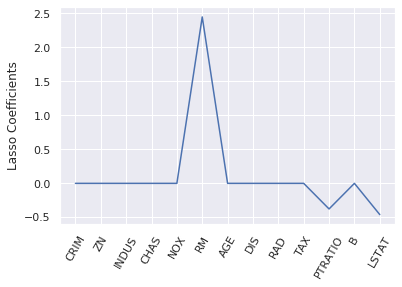

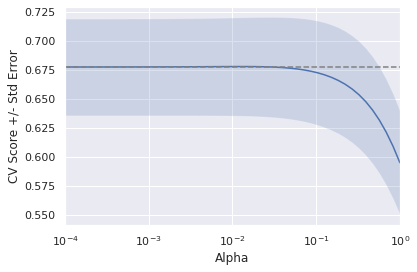

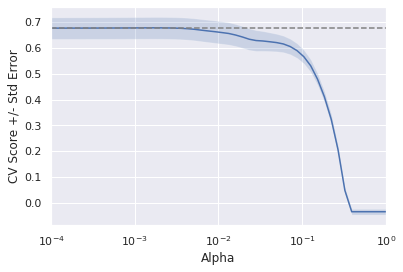

In [52]:
cv_results_3 = cross_val_score(lr_all, X, y, cv = 3)
cv_results_5 = cross_val_score(lr_all, X, y, cv = 5)
cv_results_10 = cross_val_score(lr_all, X, y, cv = 10)

print(cv_results_3)
print(round(np.mean(cv_results_3),2))
print(cv_results_5)
print(round(np.mean(cv_results_5),2))
print(cv_results_10)
print(round(np.mean(cv_results_10),2))

ridge = Ridge(alpha = 0.1, normalize = True) #change alpha for different regularization parameters
ridge.fit(X_train,y_train)
rmse = (np.sqrt(mean_squared_error(y_train, ridge.predict(X_train))))
r2 = round(ridge.score(X_train, y_train),2)
print("The ridge regression model performance on training set")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))
rmse = (np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
r2 = round(ridge.score(X_test, y_test),2)
print("The ridge regression model performance on test set")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))

lasso = Lasso(alpha = 0.1, normalize = True) #change alpha for different regularization parameters
lasso.fit(X_train,y_train)
rmse = (np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))))
r2 = round(lasso.score(X_train, y_train),2)
print("The lasso regression model performance on training set")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))
rmse = (np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
r2 = round(lasso.score(X_test, y_test),2)
print("The lasso regression model performance on test set")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))

plt.plot(range(len(boston_dataset.feature_names)),ridge.coef_)
plt.xticks(range(len(boston_dataset.feature_names)),boston_dataset.feature_names, rotation = 60)
plt.ylabel('Ridge Coefficients')
plt.show()

plt.plot(range(len(boston_dataset.feature_names)),lasso.coef_)
plt.xticks(range(len(boston_dataset.feature_names)),boston_dataset.feature_names, rotation = 60)
plt.ylabel('Lasso Coefficients')
plt.show()

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
ridge = Ridge(normalize=True)
for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge,X_train,y_train,cv = 10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
lasso_scores = []
lasso_scores_std = []
lasso = Lasso(normalize=True)
for alpha in alpha_space:
    lasso.alpha = alpha
    lasso_cv_scores = cross_val_score(lasso,X_train,y_train,cv = 10)
    lasso_scores.append(np.mean(lasso_cv_scores))
    lasso_scores_std.append(np.std(lasso_cv_scores))

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


display_plot(ridge_scores, ridge_scores_std)
display_plot(lasso_scores, lasso_scores_std)